## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Tweet Twitter terkait COVID-19 periode April hingga Juni 2021. 
##### 1. Analisis Sentimen terhadap Tweet terkait COVID-19. Data Tweet yang dikumpulkan selama periode April hingga Juni 2021. Tujuan Analisis	Untuk mengidentifikasi dan mengukur opini (positif, negatif, atau netral) publik di Twitter mengenai pandemi COVID-19 selama periode tersebut. Kolom Teks Utama	original_text (teks asli) . Data ini dapat diperoleh dari kaggle.


##### 2. Penjelasan Setiap Kolom Data

Berikut merupakan penjelasan untuk kolom-kolom kunci:
1. ID unik dari tweet tersebut.
2. created_at  Tanggal dan waktu tweet dibuat.
3. original_text  Konten teks tweet yang sebenarnya (sebelum pembersihan).Ini adalah kolom utama yang akan dianalisis.
4. clean_tweet teks tweet setelah melalui proses cleaning (menghilangkan link, tanda baca, dsb.). 
5. original_author  Pengguna yang membuat tweet tersebut.
6. retweet_count  Engagement Jumlah retweet yang diterima tweet tersebut.
7. favorite_count  Engagement Jumlah like (favorite) yang diterima tweet tersebut.
8. ompound  Skor sentimen gabungan (biasanya antara -1.0 dan 1.0), digunakan untuk menentukan polaritas.
9. neg Hasil  sentimen negatif (antara 0 dan 1).
10. neu Hasil  sentimen netral (antara 0 dan 1).
11. pos Hasil  sentimen positif (antara 0 dan 1).
12. sentiment Label polaritas akhir (misalnya, 'Positif', 'Negatif', 'Netral') yang diturunkan dari skor-skor di atas.

##### 3. Import Library

In [ ]:
# Untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Untuk visualisasi (opsional, tapi disarankan)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


import nltk
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
import string
import re 

# Untuk Natural Language Processing (NLP) dan Sentimen
# NLTK adalah salah satu library dasar
import nltk
nltk.download('wordnet')
#untuk labeling
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

# nltk.download(['punkt', 'stopwords', 'vader_lexicon']) # Jalankan ini jika Anda belum memiliki paket-paket ini

from nltk.sentiment.vader import SentimentIntensityAnalyzer # Algoritma sentimen populer
# Atau library yang lebih canggih seperti transformer dari Hugging Face
# from transformers import pipeline
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 4. Load Data

In [23]:

# Tentukan path file CSV Anda
file_path = 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv'

# Nama kolom yang ingin digunakan
kolom_teks = 'original_text'
kolom_tanggal = 'created_at'

try:
    # Membaca dataset hanya dengan kolom tertentu
    df = pd.read_csv(
        file_path,
        encoding='utf-8',
        usecols=[kolom_teks, kolom_tanggal],  # hanya ambil dua kolom
        parse_dates=[kolom_tanggal]           # parsing kolom tanggal
    )
    
    # Menampilkan beberapa baris pertama
    print(" Data berhasil dimuat. Berikut 5 baris pertama:")
    display(df.head())  # gunakan display() biar tabel rapi di Jupyter
    
    # Info dataset
    print("\n=====================")
    print(" Info Dataset:")
    df.info()

except FileNotFoundError:
    print(f" Error: File '{file_path}' tidak ditemukan.")
    print("Pastikan file tersebut ada di direktori yang sama dengan script Anda.")
except ValueError as e:
    print(f" Kolom tidak ditemukan dalam file: {e}")
except Exception as e:
    print(f" Terjadi error saat memuat data: {e}")


 Data berhasil dimuat. Berikut 5 baris pertama:


,created_at,original_text
0,2021-04-26,RT @VP: The U.S. is working closely with the Indian government to rapidly deploy additional support and supplies during an alarming COVID-1…
1,2021-04-26,RT @JackPosobiec: Flip-Flop Fauci admits outdoor COVID transmission is very low https://t.co/6ztO7pOH1i
2,2021-04-26,"RT @timmy315: Hi Twitter, I’m Tim Manning, the White House COVID-19 Supply Coordinator. There’s been a lot of confusion around the use of t…"
3,2021-04-26,RT @itsaadee: Praying for #India as the country battles the worst #Covid-19 surge the world has witnessed. Let's all - irrespective of the…
4,2021-04-26,Rapid Investment in Nursing to Strengthen the Global COVID-19 Response https://t.co/z0mDQDGgTu



 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147475 entries, 0 to 147474
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   created_at     147475 non-null  datetime64[ns]
 1   original_text  147475 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.3+ MB


## Data Understanding

In [111]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [24]:
# 1. Jumlah baris data
jumlah_baris = len(df)
print(f"Jumlah total baris data (tweet): {jumlah_baris}")


Jumlah total baris data (tweet): 147475


#### 2. Panjang Rata - Rata Setiap Baris

In [25]:
# 2. Panjang rata-rata setiap baris (berdasarkan jumlah karakter)
df['text_length'] = df['original_text'].astype(str).apply(len)
rata_panjang = df['text_length'].mean()

print(f"Panjang rata-rata setiap baris (tweet): {rata_panjang:.2f} karakter")


Panjang rata-rata setiap baris (tweet): 131.62 karakter


#### 3. Cek Data Duplikasi

In [26]:
# 3. Cek data duplikasi
duplikat = df.duplicated(subset='original_text').sum()
print(f"Jumlah data duplikat berdasarkan kolom original_text: {duplikat}")


Jumlah data duplikat berdasarkan kolom original_text: 0


#### 4. Cek Data Kosong

In [27]:
# 4. Cek data kosong
print("Jumlah data kosong (NaN) per kolom:")
print(df.isnull().sum())



Jumlah data kosong (NaN) per kolom:
created_at       0
original_text    0
text_length      0
dtype: int64


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### Line Chart

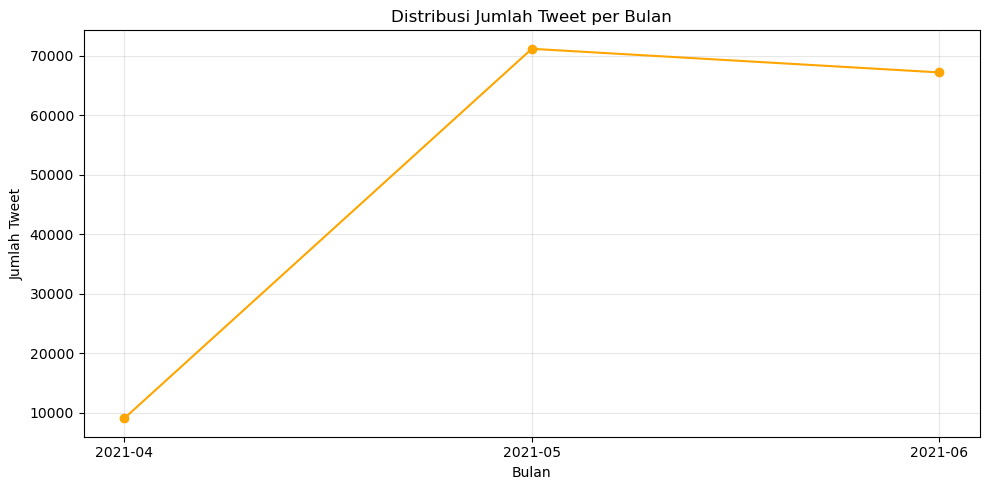

In [ ]:
# berdasarkan bulan
tweet_per_bulan = df.groupby(df['created_at'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
plt.plot(tweet_per_bulan.index.astype(str), tweet_per_bulan.values, marker='o', color='orange')
plt.title('Distribusi Jumlah Tweet per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Tweet')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Word Cloud

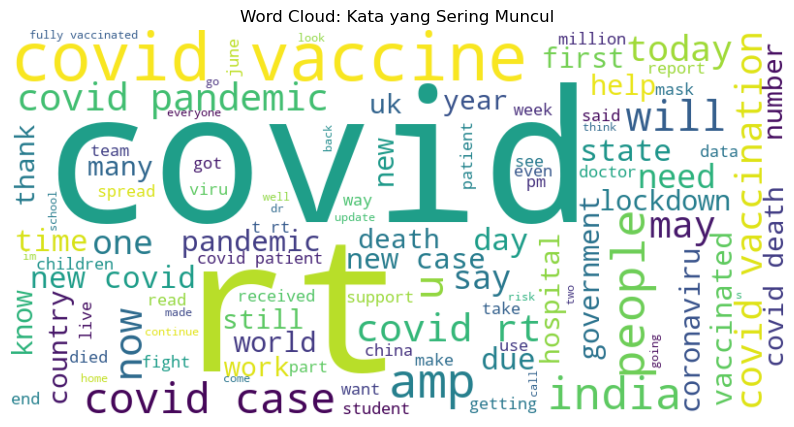

In [28]:
# 5. Distribusi data - kata yang sering muncul
# Bersihkan teks sederhana (hapus simbol, angka, dan tanda baca)
def bersihkan_teks(teks):
    teks = str(teks).lower()
    teks = re.sub(r'http\S+', '', teks)          # hapus link
    teks = re.sub(r'[^a-z\s]', '', teks)         # hapus angka dan simbol
    return teks

df['clean_text'] = df['original_text'].apply(bersihkan_teks)

# Gabungkan semua teks menjadi satu string besar
all_words = ' '.join(df['clean_text'])

# Buat wordcloud
plt.figure(figsize=(10,6))
wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Kata yang Sering Muncul')
plt.show()


#### Bar Chart

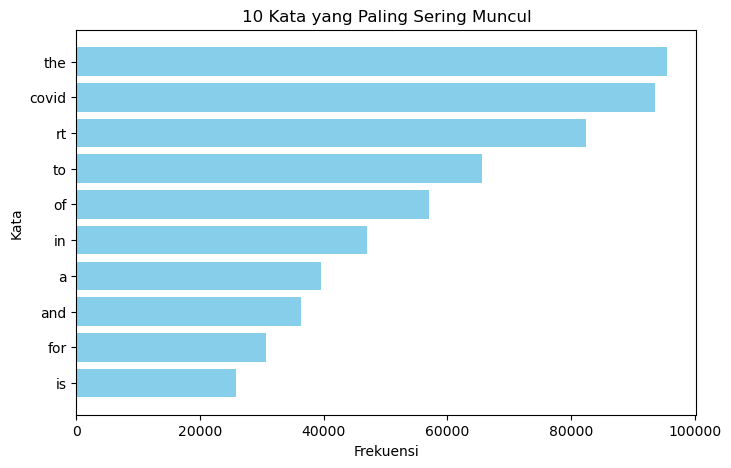

In [29]:
from collections import Counter

# Hitung frekuensi kata
word_counts = Counter(all_words.split())
kata_teratas = dict(word_counts.most_common(10))

plt.figure(figsize=(8,5))
plt.barh(list(kata_teratas.keys()), list(kata_teratas.values()), color='skyblue')
plt.title('10 Kata yang Paling Sering Muncul')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.gca().invert_yaxis()
plt.show()


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 

In [32]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenisasi
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(str(x)))
print("Contoh hasil tokenisasi:")
print(df['tokens'].head())


[nltk_data] Downloading package punkt to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Contoh hasil tokenisasi:
0    [rt, vp, the, us, is, working, closely, with, the, indian, government, to, rapidly, deploy, additional, support, and, supplies, during, an, alarming, covid]
1                                                                        [rt, jackposobiec, flipflop, fauci, admits, outdoor, covid, transmission, is, very, low]
2         [rt, timmy, hi, twitter, im, tim, manning, the, white, house, covid, supply, coordinator, theres, been, a, lot, of, confusion, around, the, use, of, t]
3          [rt, itsaadee, praying, for, india, as, the, country, battles, the, worst, covid, surge, the, world, has, witnessed, lets, all, irrespective, of, the]
4                                                                                  [rapid, investment, in, nursing, to, strengthen, the, global, covid, response]
Name: tokens, dtype: object


#### 2. Lemmatization 

In [33]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])
print("Contoh hasil lemmatization:")
print(df['lemmatized'].head())


[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Contoh hasil lemmatization:
0    [rt, vp, the, u, is, working, closely, with, the, indian, government, to, rapidly, deploy, additional, support, and, supply, during, an, alarming, covid]
1                                                                     [rt, jackposobiec, flipflop, fauci, admits, outdoor, covid, transmission, is, very, low]
2       [rt, timmy, hi, twitter, im, tim, manning, the, white, house, covid, supply, coordinator, there, been, a, lot, of, confusion, around, the, use, of, t]
3           [rt, itsaadee, praying, for, india, a, the, country, battle, the, worst, covid, surge, the, world, ha, witnessed, let, all, irrespective, of, the]
4                                                                               [rapid, investment, in, nursing, to, strengthen, the, global, covid, response]
Name: lemmatized, dtype: object


#### 3. Stemming

In [34]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])
print("Contoh hasil stemming:")
print(df['stemmed'].head())


Contoh hasil stemming:
0       [rt, vp, the, us, is, work, close, with, the, indian, govern, to, rapidli, deploy, addit, support, and, suppli, dure, an, alarm, covid]
1                                                          [rt, jackposobiec, flipflop, fauci, admit, outdoor, covid, transmiss, is, veri, low]
2    [rt, timmi, hi, twitter, im, tim, man, the, white, hous, covid, suppli, coordin, there, been, a, lot, of, confus, around, the, use, of, t]
3          [rt, itsaade, pray, for, india, as, the, countri, battl, the, worst, covid, surg, the, world, ha, wit, let, all, irrespect, of, the]
4                                                                        [rapid, invest, in, nurs, to, strengthen, the, global, covid, respons]
Name: stemmed, dtype: object


#### 4. Stopword Removal (Tanda Baca, Angka, dan Kata)

In [36]:
from nltk.corpus import stopwords
import string
import re 

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def bersihkan_kata(tokens):
    return [
        t for t in tokens
        if t not in stop_words
        and t not in string.punctuation
        and not re.match(r'^\d+$', t)
    ]

df['clean_tokens'] = df['lemmatized'].apply(bersihkan_kata)
print("Contoh hasil stopword removal:")
print(df['clean_tokens'].head())


[nltk_data] Downloading package stopwords to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Contoh hasil stopword removal:
0     [rt, vp, u, working, closely, indian, government, rapidly, deploy, additional, support, supply, alarming, covid]
1                                       [rt, jackposobiec, flipflop, fauci, admits, outdoor, covid, transmission, low]
2    [rt, timmy, hi, twitter, im, tim, manning, white, house, covid, supply, coordinator, lot, confusion, around, use]
3        [rt, itsaadee, praying, india, country, battle, worst, covid, surge, world, ha, witnessed, let, irrespective]
4                                                    [rapid, investment, nursing, strengthen, global, covid, response]
Name: clean_tokens, dtype: object


#### 5. Text Normalisasi
Mengubah teks ke bentuk standar (huruf kecil, hapus spasi berlebih, singkatan umum, dsb).

In [37]:
def normalisasi_teks(teks):
    teks = teks.lower()
    teks = re.sub(r'http\S+', '', teks)          # hapus URL
    teks = re.sub(r'@\w+', '', teks)             # hapus mention
    teks = re.sub(r'#\w+', '', teks)             # hapus hashtag
    teks = re.sub(r'[^a-z\s]', '', teks)         # hapus tanda baca & angka
    teks = re.sub(r'\s+', ' ', teks).strip()     # rapikan spasi
    return teks

df['normalized_text'] = df['original_text'].apply(normalisasi_teks)
print("Contoh hasil normalisasi teks:")
print(df['normalized_text'].head())


Contoh hasil normalisasi teks:
0    rt the us is working closely with the indian government to rapidly deploy additional support and supplies during an alarming covid
1                                                                       rt flipflop fauci admits outdoor covid transmission is very low
2              rt hi twitter im tim manning the white house covid supply coordinator theres been a lot of confusion around the use of t
3                            rt praying for as the country battles the worst surge the world has witnessed lets all irrespective of the
4                                                                   rapid investment in nursing to strengthen the global covid response
Name: normalized_text, dtype: object


#### 6. Matrix Correlation

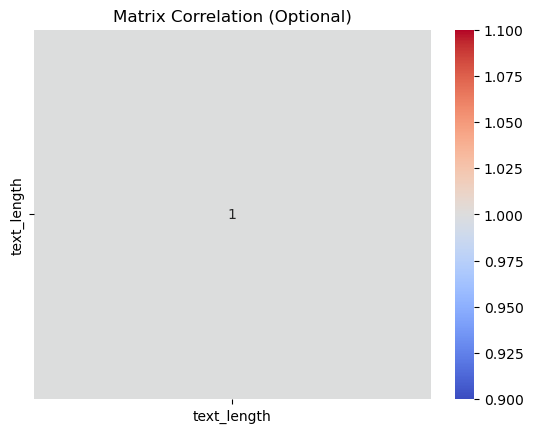

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'text_length' in df.columns:
    corr = df[['text_length']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Matrix Correlation (Optional)')
    plt.show()


#### 7. Labeling Data 

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi analyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(teks):
    skor = analyzer.polarity_scores(teks)
    compound = skor['compound']  # nilai keseluruhan sentimen (-1 s/d +1)
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Terapkan pada kolom teks bersih
df['sentiment'] = df['normalized_text'].apply(get_vader_sentiment)

# Lihat hasil
print("Contoh hasil labeling dengan VADER:")
print(df[['normalized_text', 'sentiment']].head())


ModuleNotFoundError: No module named 'vaderSentiment'

#### 6. Text Vektorisasi

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("\n--- Memulai Text Vektorisasi (TF-IDF) ---")

vectorizer = TfidfVectorizer(max_features=5000) 
X = vectorizer.fit_transform(df['processed_text']).toarray()

print("Vektorisasi Selesai.")
print(f"Dimensi Matriks Fitur (X): {X.shape}")


--- Memulai Text Vektorisasi (TF-IDF) ---


MemoryError: Unable to allocate 9.35 GiB for an array with shape (250865, 5000) and data type float64

#### 7. Data Splitting

In [59]:
from sklearn.model_selection import train_test_split

print("\n--- Memulai Data Splitting (0.8, 0.2) ---")

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

print("Data Splitting Selesai.")
print(f"Ukuran Data Pelatihan (X_train): {X_train.shape}")


--- Memulai Data Splitting (0.8, 0.2) ---
Data Splitting Selesai.
Ukuran Data Pelatihan (X_train): (200692, 5000)


#### 8. Matrix Correlation 

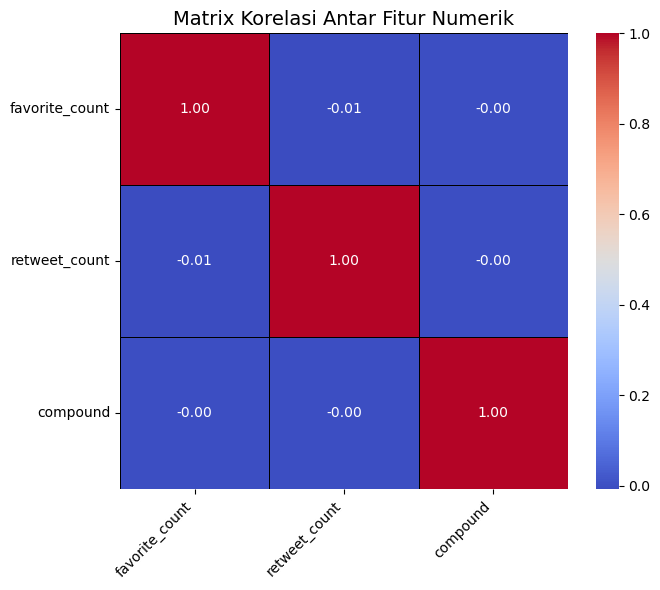

In [60]:
# Kolom Numerik yang Relevan
NUMERIC_COLS = ['favorite_count', 'retweet_count', 'compound'] 

# 1. Konversi Kolom Sentimen (Compound) ke Numerik 
if 'compound' in df.columns:
    df['compound'] = pd.to_numeric(df['compound'], errors='coerce')

# 2. Filter kolom yang ada dan hapus NaN
existing_numeric_cols = [col for col in NUMERIC_COLS if col in df.columns]
df_corr = df[existing_numeric_cols].dropna()

# 3. Hitung dan Visualisasi Korelasi
if len(df_corr) >= 2:
    correlation_matrix = df_corr.corr()
    
    plt.figure(figsize=(7, 6))
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f",
        linewidths=.5,
        linecolor='black'
    )
    plt.title('Matrix Korelasi Antar Fitur Numerik', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')

## Data Modeling

In [3]:
# Berikan Penjelasan tentang model yang dipilih

#### Penjelasan Model

Model yang digunakan adalah Support Vector Machine (SVM), dimana algoritma ini merupakan pembelajaran terawasi (supervised learning) yang sangat efektif untuk tugas klasifikasi dan regresi, terutama dalam ruang fitur berdimensi tinggi, seperti data teks yang divetorisasi menggunakan TF-IDF.

##### 1. Konsep Dasar: Hyperplane dan Margin 
Tujuan utama SVM adalah menemukan hyperplane (bidang pemisah) terbaik yang membagi kelas-kelas data (Positif, Negatif, Netral) dalam ruang $N$-dimensi.Hyperplane: Batas keputusan yang memisahkan titik data dari kelas yang berbeda.Margin: Jarak antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut Support Vectors.Optimal Hyperplane: SVM mencari hyperplane yang memiliki margin terbesar. Margin yang besar memberikan batas keputusan yang lebih kokoh dan membantu model memiliki kemampuan generalisasi yang lebih baik ke data baru.

##### 2. Penerapan SVM pada Data Teks (TF-IDF)

Dalam proyek Anda, data input ke SVM adalah matriks numerik yang dihasilkan dari TF-IDF Vectorization 
($X_{\text{train}}$ dan $X_{\text{test}}$).Fitur: Setiap dimensi (kolom) dalam matriks TF-IDF merepresentasikan bobot pentingnya suatu kata dalam kalimat (fitur). Karena TF-IDF biasanya menghasilkan ribuan fitur (kata unik), data Anda berada dalam ruang berdimensi tinggi.Proses: SVM menggunakan bobot-bobot TF-IDF ini untuk menentukan bagaimana setiap kalimat (data point) ditempatkan di ruang fitur. Kemudian, ia menemukan hyperplane optimal yang memisahkan kalimat-kalimat yang memiliki sentimen berbeda (misalnya, memisahkan kalimat "Netral" dari "Positif").

##### 3. Kernel Trick (Penanganan Data Non-Linier)

Salah satu kekuatan terbesar SVM adalah kemampuannya menangani data yang tidak dapat dipisahkan secara linier (data yang tidak bisa dipisah hanya dengan garis lurus atau bidang datar).

Fungsi Kernel: Melalui teknik yang disebut Kernel Trick, SVM secara implisit memetakan data Anda ke ruang berdimensi lebih tinggi. Di ruang baru ini, data non-linier menjadi dapat dipisahkan secara linier.

Pilihan Kernel: Untuk data TF-IDF (yang cenderung sudah cukup linier), kernel Linear seringkali merupakan pilihan yang cepat dan efektif. Namun, kernel seperti Radial Basis Function (RBF) dapat digunakan jika batas pemisahan sentimen ternyata kompleks.

##### 4. SVM

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Asumsi: X_train, X_test, y_train, y_test sudah terdefinisi dari Data Splitting.

# Inisialisasi model Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model dengan data training
svm_model.fit(X_train, y_train)

# Membuat prediksi pada data testing <-- BARIS KRUSIAL INI HARUS DIJALANKAN
y_pred_svm = svm_model.predict(X_test)

print("Prediksi model SVM berhasil dibuat!")

Prediksi model SVM berhasil dibuat!


## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

#### 1. Confussion Matrix

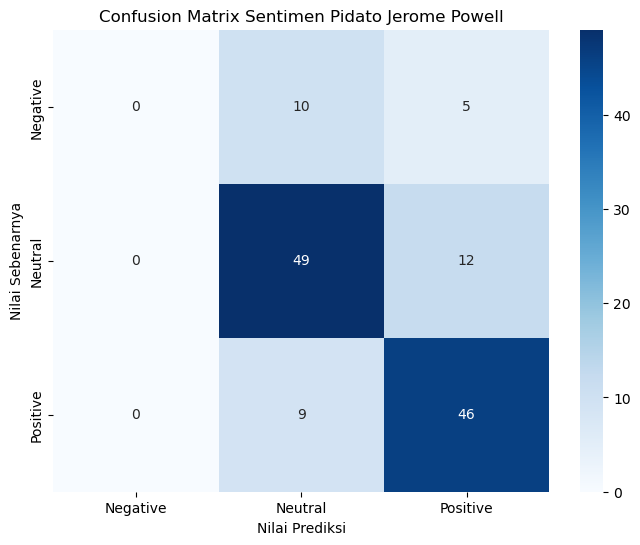

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Dapatkan label unik (Sentimen: Negative, Neutral, Positive)
labels = sorted(y_test.unique())

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=labels, 
    yticklabels=labels
)
plt.title('Confusion Matrix Sentimen Pidato Jerome Powell')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.show()

#### 2. Laporan Klasifikasi

In [21]:
from sklearn.metrics import classification_report

# Cetak Classification Report
print("--- Classification Report (SVM Model) ---")
print(classification_report(y_test, y_pred_svm))

--- Classification Report (SVM Model) ---
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.72      0.80      0.76        61
    Positive       0.73      0.84      0.78        55

    accuracy                           0.73       131
   macro avg       0.48      0.55      0.51       131
weighted avg       0.64      0.73      0.68       131



c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dede Ahmad Maolana\miniconda3\envs\dede\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru

#### 1. Menambahkan Data Baru 

##### Data baru perkalimat 

In [22]:
# Data teks baru yang akan diprediksi
new_statements = [
    "We remain highly attentive to inflation risks and are prepared to adjust policy as appropriate.",
    "The labor market is strong, suggesting durable economic resilience.",
    "There are indications that the pace of rate hikes should slow down.",
    "The outlook for global growth has deteriorated significantly.",
    "We see persistent evidence of downside risks to employment."

]


# Buat DataFrame baru
df_new = pd.DataFrame({'Statement': new_statements})

print("Data Baru yang akan diprediksi:")
print(df_new)

Data Baru yang akan diprediksi:
                                           Statement
0  We remain highly attentive to inflation risks ...
1  The labor market is strong, suggesting durable...
2  There are indications that the pace of rate hi...
3  The outlook for global growth has deteriorated...
4  We see persistent evidence of downside risks t...


##### Data dari kaggle yang sama

In [95]:

# Tentukan path file TXT baru Anda
file_path_new_txt = 'New_statment.txt' 

# Load teks dari file dan pisahkan menjadi kalimat
try:
    with open(file_path_new_txt, 'r', encoding='utf-8') as file:
        full_text_new = file.read()
    
    # Tokenisasi teks menjadi daftar kalimat
    sentences_new = sent_tokenize(full_text_new)
    
    # Buat DataFrame baru
    df_new = pd.DataFrame(sentences_new, columns=['Statement'])
    
    print(f"Data baru berhasil dimuat. Total {len(df_new)} kalimat.")
except FileNotFoundError:
    print(f"Error: File TXT tidak ditemukan di {file_path_new_txt}. Pastikan path benar.")
    df_new = pd.DataFrame({'Statement': []}) # Buat DataFrame kosong agar kode tidak error

Data baru berhasil dimuat. Total 597 kalimat.


#### 2. Pemrosesan Teks Data Baru
Data baru harus melalui semua langkah pra-pemrosesan yang sama persis seperti data pelatihan (Tokenisasi, Stopword Removal, Lemmatization).

In [23]:
# Inisialisasi tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Fungsi pembersihan yang sama dari langkah sebelumnya
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token.isdigit() or token in punctuation or token in stop_words or len(token) <= 1:
            continue
        cleaned_tokens.append(token)
    return cleaned_tokens

# Terapkan semua langkah pre-processing pada df_new

# 1. Tokenisasi & Case Folding
df_new['Tokens'] = df_new['Statement'].apply(lambda x: word_tokenize(x.lower()))

# 2. Stopword Removal & Pembersihan
df_new['Cleaned_Tokens'] = df_new['Tokens'].apply(clean_tokens)

# 3. Lemmatization
df_new['Lemmatized_Tokens'] = df_new['Cleaned_Tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# 4. Gabungkan kembali menjadi teks bersih
df_new['data_bersih'] = df_new['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))

print("\nData Baru Setelah Pembersihan:")
print(df_new['data_bersih'])


Data Baru Setelah Pembersihan:
0    remain highly attentive inflation risk prepare...
1    labor market strong suggesting durable economi...
2                       indication pace rate hike slow
3     outlook global growth deteriorated significantly
4     see persistent evidence downside risk employment
Name: data_bersih, dtype: object


#### 3. Vektorisasi Data Baru

In [24]:
# Vektorisasi data baru menggunakan vectorizer yang sudah ada
X_new = tfidf_vectorizer.transform(df_new['data_bersih']).toarray()

print(f"\nBentuk Matriks Fitur Data Baru: {X_new.shape}")


Bentuk Matriks Fitur Data Baru: (5, 1338)


#### 4. Prediksi Menggunakan Model SVM

In [25]:
# Membuat prediksi sentimen
predictions = svm_model.predict(X_new)

# Tambahkan hasil prediksi ke DataFrame baru
df_new['Predicted_Sentiment'] = predictions

# Tampilkan hasil akhir
print("\n--- Hasil Prediksi Sentimen ---")
print(df_new[['Statement', 'Predicted_Sentiment']])


--- Hasil Prediksi Sentimen ---
                                           Statement Predicted_Sentiment
0  We remain highly attentive to inflation risks ...            Positive
1  The labor market is strong, suggesting durable...            Positive
2  There are indications that the pace of rate hi...             Neutral
3  The outlook for global growth has deteriorated...            Positive
4  We see persistent evidence of downside risks t...            Negative


# Virtualisasi

C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_484\902934620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')


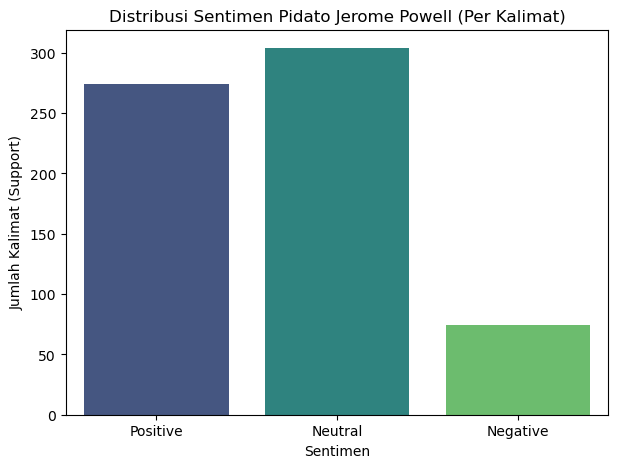

In [26]:

# Asumsi: Kolom 'Sentiment' (hasil VADER) sudah ada di df
plt.figure(figsize=(7, 5))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Distribusi Sentimen Pidato Jerome Powell (Per Kalimat)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Kalimat (Support)')
plt.show()

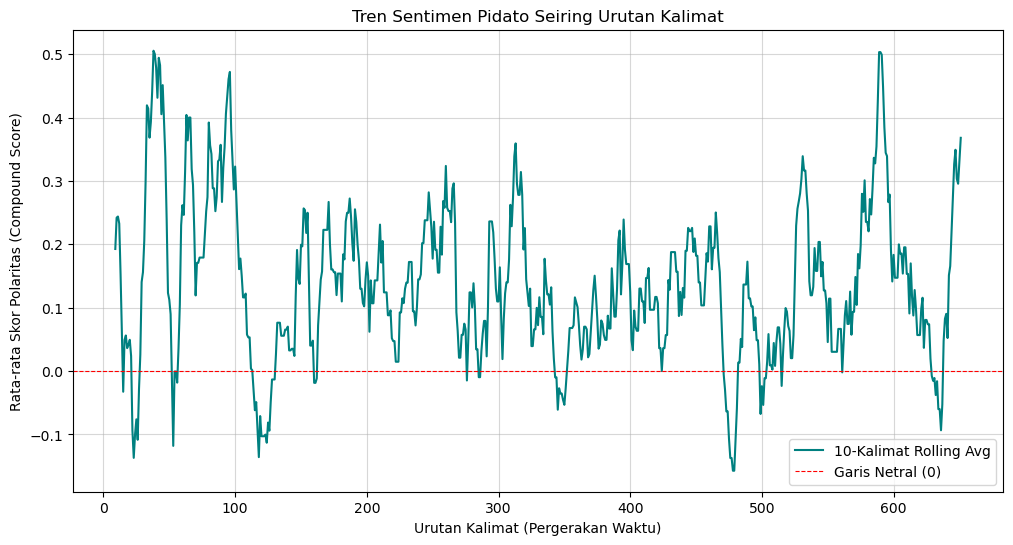

In [27]:
# Pastikan kolom 'Date' adalah datetime dan 'Polarity_Score' sudah ada

# 1. Pastikan data di kelompokkan (jika Anda memiliki data dari banyak tanggal)
# df['Date'] = pd.to_datetime(df['Date'])
# sentiment_over_time = df.groupby(df['Date'].dt.date)['Polarity_Score'].mean().reset_index()

# Untuk contoh ini, kita asumsikan setiap baris adalah urutan waktu
# dan kita gunakan rata-rata rolling window untuk kelancaran visualisasi
window_size = 10
df['Rolling_Polarity'] = df['Polarity_Score'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling_Polarity'], label=f'{window_size}-Kalimat Rolling Avg', color='teal')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Garis Netral (0)')
plt.title('Tren Sentimen Pidato Seiring Urutan Kalimat')
plt.xlabel(f'Urutan Kalimat (Pergerakan Waktu)')
plt.ylabel('Rata-rata Skor Polaritas (Compound Score)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

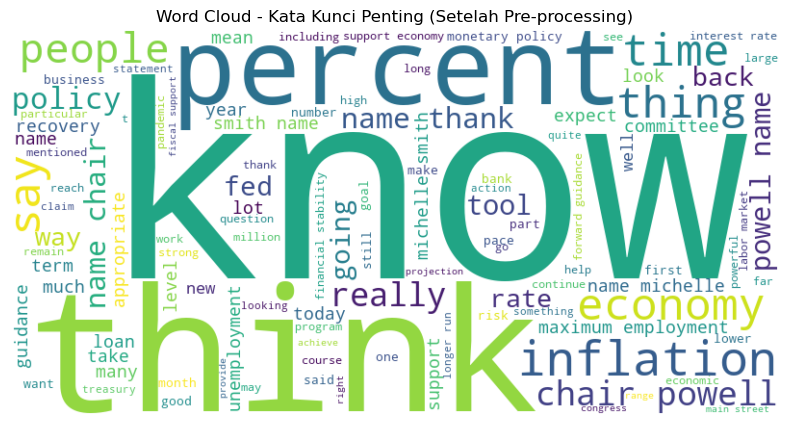

In [28]:
from wordcloud import WordCloud

# Asumsi: Kolom 'Cleaned_Text' (teks bersih setelah pre-processing) sudah ada
all_clean_text = ' '.join(df['Cleaned_Text'].astype(str))

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    min_font_size=10
).generate(all_clean_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Kata Kunci Penting (Setelah Pre-processing)")
plt.show()